In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [3]:
df=pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [4]:
df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
102395,102395,US,"This jammy, crowd-pleasing Zin is well put-tog...",Old Vine,86,12.0,California,Lodi,Central Valley,Virginie Boone,@vboone,Gnarly Head 2011 Old Vine Zinfandel (Lodi),Zinfandel,Gnarly Head
35065,35065,US,Curiously perfumed with notes of roasted hazel...,NaN,83,15.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Shaw 2005 Chardonnay (Finger Lakes),Chardonnay,Shaw
125945,125945,US,From an almost centenarian vineyard planted to...,Carlisle Vineyard,90,47.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Carlisle 2014 Carlisle Vineyard Zinfandel (Rus...,Zinfandel,Carlisle
64156,64156,US,This full-bodied but stealthy and deep wine lo...,NaN,92,16.0,California,El Dorado,Sierra Foothills,Jim Gordon,@gordone_cellars,Boeger 2014 Primitivo (El Dorado),Primitivo,Boeger
66608,66608,US,This is an affordable and refreshingly light-b...,NaN,87,18.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Camp 2014 Zinfandel (Sonoma County),Zinfandel,Camp


In [5]:
data=df.copy()

In [6]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
data.describe(include="all")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop extra columns

In [8]:
df=df.drop(columns=["Unnamed: 0","country","designation","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery","price"],axis=1)

In [9]:
df.shape

(129971, 2)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df.head(100)

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
...,...,...
95,"This is a dense wine, packed with both tannins...",88
96,The wine comes from one of the cru estates fol...,88
97,A wisp of bramble extends a savory tone from n...,88
98,"Forest floor, menthol, espresso, cranberry and...",88


## Check Missing data

In [12]:
Missing=df.isnull().sum()
Missing

description    0
points         0
dtype: int64

#### There is no missing data

# Data Cleaning

### Remove Duplicates

In [13]:
sum(df.duplicated())

9993

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(119978, 2)

### Remove Hashtags

In [15]:
df['description'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

### Remove Mentions

In [16]:
df['description'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

### Remove http links

In [17]:
df['description'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

## Convert all characters to lower case

In [18]:
df['description']=df['description'].str.lower()

## Remove Stopwords

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Remove punctuation

In [20]:
df["description"] = df['description'].str.replace('[^\w\s]','', regex = True)

In [21]:
df.sample(frac=0.2,ignore_index=True,random_state=1,replace=True)

,description,points
0,aromas toast french oak pressed yellow flower ...,87
1,big stacked deep dark malbec nose rich spicy b...,90
2,bergfeld named winerys historic owner land ori...,92
3,intensely herbaceous almost fruity crisp good ...,84
4,heavy pinot noir lacking lively mouthfeel alth...,86
...,...,...
23991,mellow touch ripe red delicious apple hovers n...,93
23992,smoky aromas black plum wild berry clove prece...,94
23993,apple stonefruit aromas basic mild good creamy...,86
23994,dark berry herb bluefruit aromas lead silky fr...,88


# EDA

In [22]:
import matplotlib.pyplot as plt

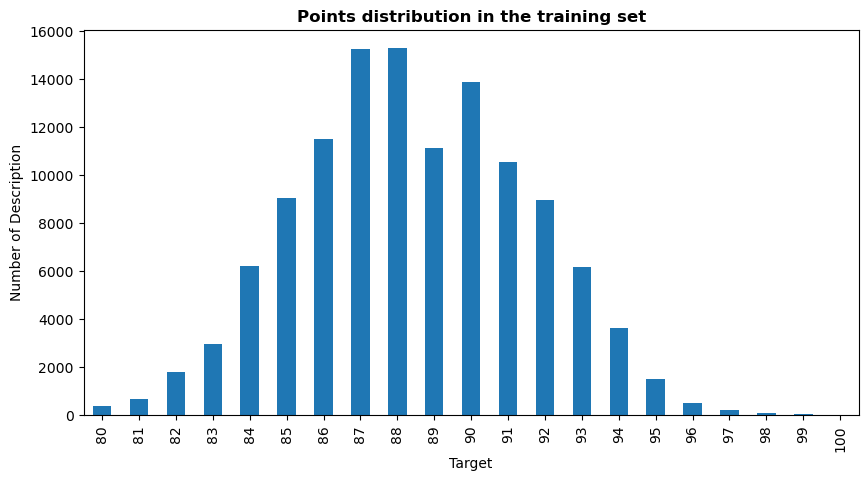

In [23]:
df['points'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Points distribution in the training set',fontweight="bold")
plt.xlabel('Target')
plt.ylabel('Number of Description')
plt.show()


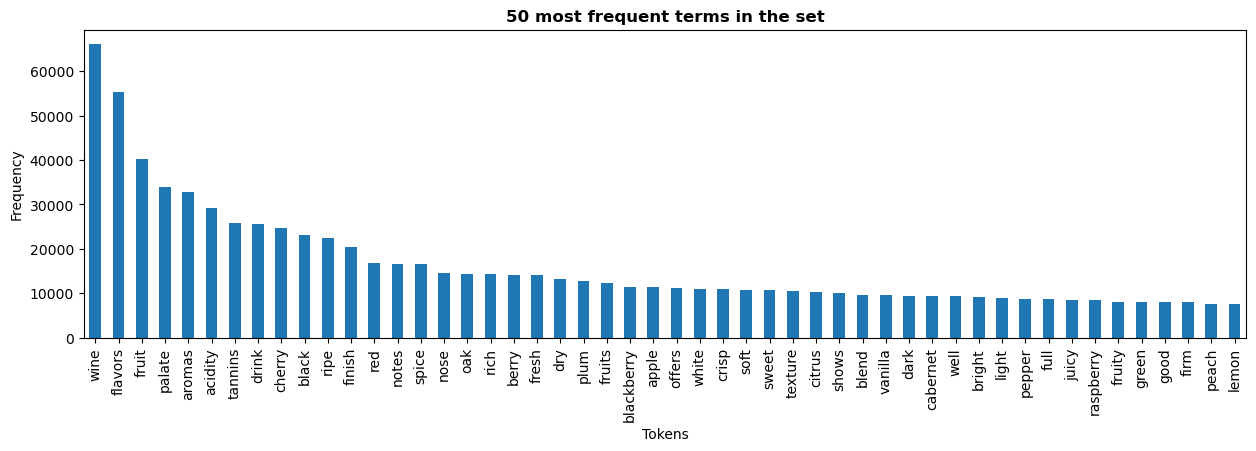

In [24]:
frequent_words = pd.Series(''.join(df['description']).split()).value_counts()[:50]
frequent_words.plot.bar(figsize=(15,4))
plt.title('50 most frequent terms in the set',fontweight="bold")
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

In [25]:
frequent_words = list(frequent_words.index)

In [26]:
def frequent_words_removal(df):    
    df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in frequent_words))
    

In [27]:
frequent_words_removal(df)
print(df['description'].head())

0    include tropical broom brimstone dried herb ov...
1    smooth still structured filled freshened alrea...
2    tart snappy lime flesh rind dominate pineapple...
3    pineapple rind pith orange blossom start bit o...
4    much like regular bottling 2012 comes across r...
Name: description, dtype: object


In [28]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[-10:]
freq

leafbud        1
boscarellis    1
endofsummer    1
fairbarn       1
fraiche        1
stateis        1
smudgy         1
creamwhat      1
20182015       1
welldrained    1
dtype: int64

In [29]:
freq = list(freq.index)

In [30]:
def rare_words_removal(df):
    df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


In [31]:
rare_words_removal(df)
print(df['description'].head())

0    include tropical broom brimstone dried herb ov...
1    smooth still structured filled freshened alrea...
2    tart snappy lime flesh rind dominate pineapple...
3    pineapple rind pith orange blossom start bit o...
4    much like regular bottling 2012 comes across r...
Name: description, dtype: object


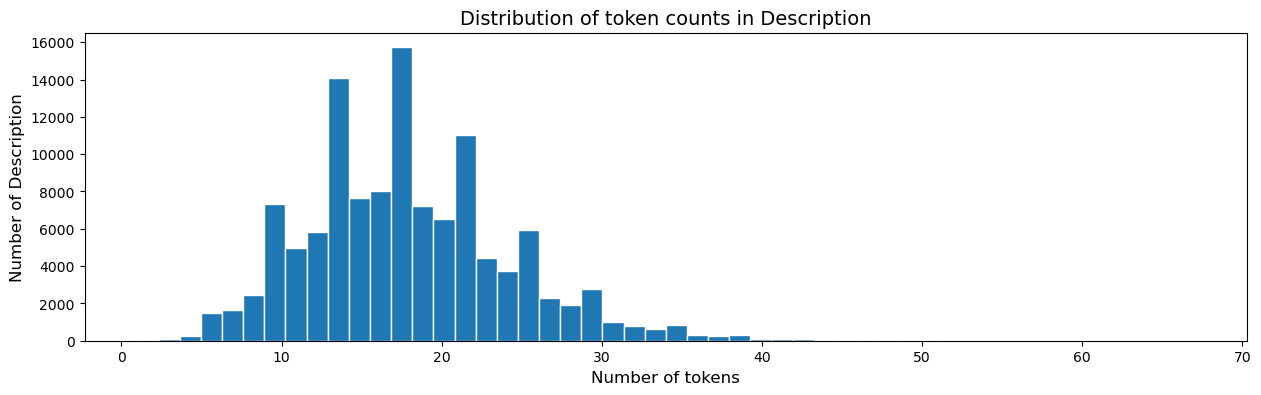

In [32]:
plt.figure(figsize=(15,4))
plt.hist(df['description'].apply(lambda x:len(x.split())),bins=50, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of Description',fontsize=12)
plt.title('Distribution of token counts in Description', fontsize=14)
plt.show()

In [33]:
less_than_50 = df['description'].apply(lambda x: len(x.split()))< 50 

In [34]:
print(f"{(sum(less_than_50) / len(df) * 100):.2f}% of rows have less than 50 tokens.")


99.96% of rows have less than 50 tokens.


# Split data into train set, validation set and test set

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df["description"], df["points"],test_size=0.1, random_state=0)

In [37]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train,test_size=0.2, random_state=0)

In [38]:
print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_test.shape,y_test.shape)


Training data: (86384,) (86384,)
Validation data: (21596,) (21596,)
Test data: (11998,) (11998,)


In [39]:
X_tr.head(10)

44381     dusty gritty softened leesy scent foamy short ...
53172     opens flowers lemonlime almond alongside gives...
119213    earthy grassy lightly medicinal front slightly...
44146     captivating pinot noir lush sensual seduces ap...
26368     craggys pinot style trending away overt fruiti...
1038      lacks bit midpalate richness otherwise fine dr...
86165     heady lead silky sourced cool site producers b...
108510    theas selection bookends singlevineyard wines ...
76509     vines estate médoc village lamarque moulis are...
115108    lovely offdry riesling thats crisply elegant k...
Name: description, dtype: object

# Tokenize data

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_tr)
vocab_len=len(tokenizer.word_index)
max_seq_length = 50
X_tr_seq = tokenizer.texts_to_sequences(X_tr)
X_tr_seq = pad_sequences(X_tr_seq, maxlen=max_seq_length,padding='post')
X_va_seq = tokenizer.texts_to_sequences(X_va)
X_va_seq = pad_sequences(X_va_seq, maxlen=max_seq_length,padding='post')
X_te_seq = tokenizer.texts_to_sequences(X_test)
X_te_seq = pad_sequences(X_te_seq, maxlen=max_seq_length,padding='post')

In [45]:
X_tr_seq

array([[  197,   605,  1425, ...,     0,     0,     0],
       [   42,   232,   732, ...,     0,     0,     0],
       [   58,   626,   125, ...,     0,     0,     0],
       ...,
       [  125,   118,  1995, ...,     0,     0,     0],
       [  792, 13046,  4623, ...,     0,     0,     0],
       [   61,   227,   522, ...,     0,     0,     0]], dtype=int32)

In [46]:
X_va_seq.shape

(21596, 50)

In [47]:
X_te_seq.shape

(11998, 50)

In [48]:
input_shape = [X_tr_seq.shape[1]]
 
input_shape

[50]

# LSTM

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(vocab_len+1, output_dim=2, input_length=50))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=101, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 2)             78536     
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 64)            448       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_10 (Bidirecti  (None, 24, 128)          66048     
 onal)                                                           
                                                                 
 batch_normalization_15 (Bat  (None, 24, 128)          512       
 chNormalization)                                                
                                                      

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [71]:
history = model.fit(X_tr_seq,
                    y_tr,
                    validation_data=(X_va_seq, y_va),
                    callbacks=[earlystopping_cb],
                    batch_size=32,
                    epochs=15,
                    verbose=1,
                   )

Epoch 1/15
2700/2700 [==============================] - 220s 78ms/step - loss: 3.5212 - acc: 0.1531 - val_loss: 2.8442 - val_acc: 0.1865
Epoch 2/15
2700/2700 [==============================] - 206s 76ms/step - loss: 2.3078 - acc: 0.2109 - val_loss: 2.0983 - val_acc: 0.2240
Epoch 3/15
2700/2700 [==============================] - 203s 75ms/step - loss: 2.0919 - acc: 0.2213 - val_loss: 2.0263 - val_acc: 0.2358
Epoch 4/15
2700/2700 [==============================] - 198s 73ms/step - loss: 2.0168 - acc: 0.2305 - val_loss: 2.2065 - val_acc: 0.2054
Epoch 5/15
2700/2700 [==============================] - 201s 74ms/step - loss: 1.9733 - acc: 0.2423 - val_loss: 2.3719 - val_acc: 0.1729
Epoch 6/15
2700/2700 [==============================] - 205s 76ms/step - loss: 1.9365 - acc: 0.2538 - val_loss: 2.4167 - val_acc: 0.1511
Epoch 7/15
2700/2700 [==============================] - 206s 76ms/step - loss: 1.9081 - acc: 0.2643 - val_loss: 2.8846 - val_acc: 0.1378


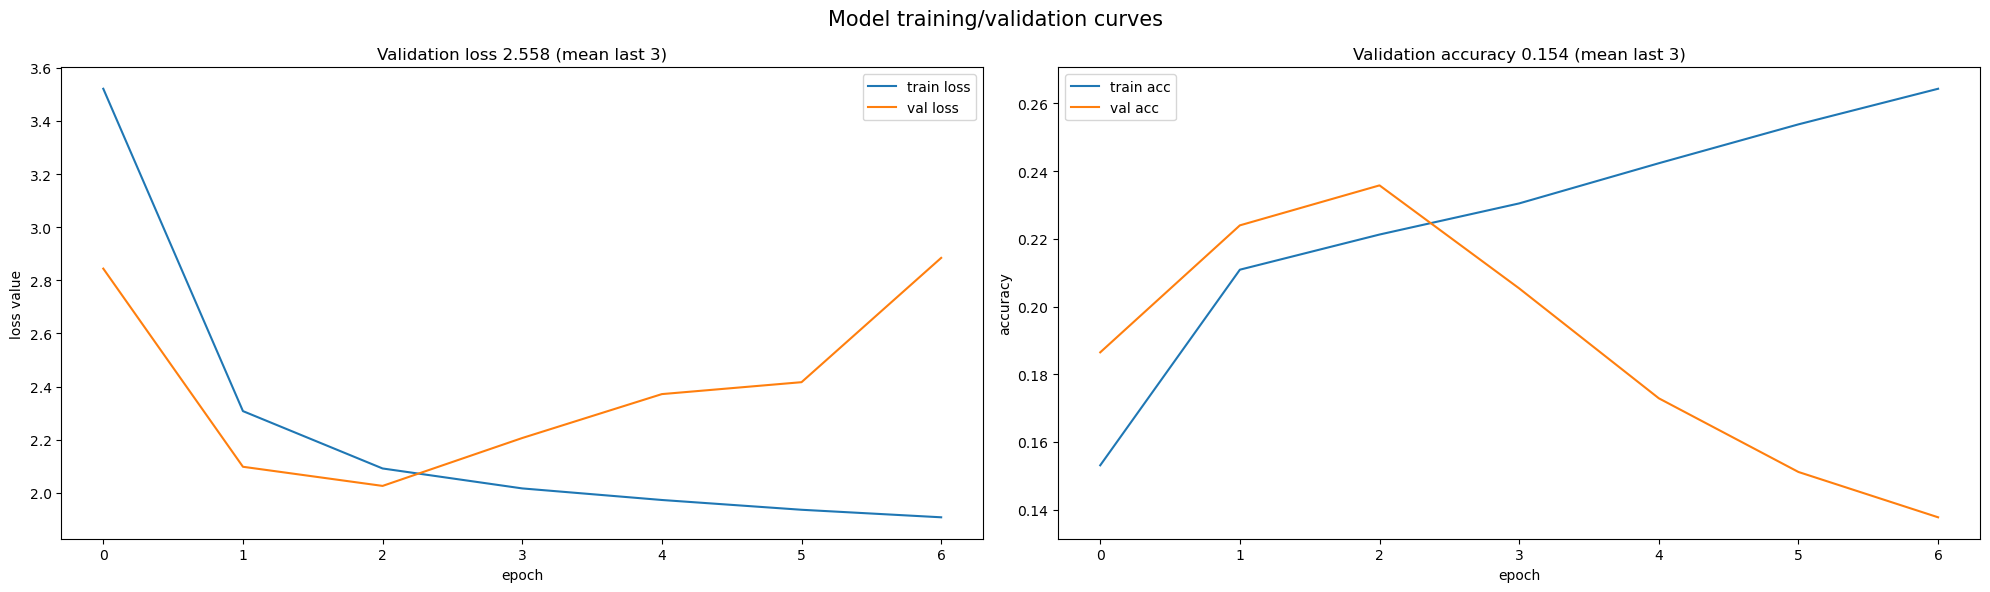

In [73]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [74]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

675/675 [==============================] - 15s 22ms/step - loss: 2.0263 - acc: 0.2358
Validation loss: 2.0262651443481445
Validation accuracy: 0.2357844114303589


In [83]:
pred = [np.argmax(i.round()+87) for i in model.predict(X_va_seq)]
# pred=pred.round()

675/675 [==============================] - 15s 22ms/step


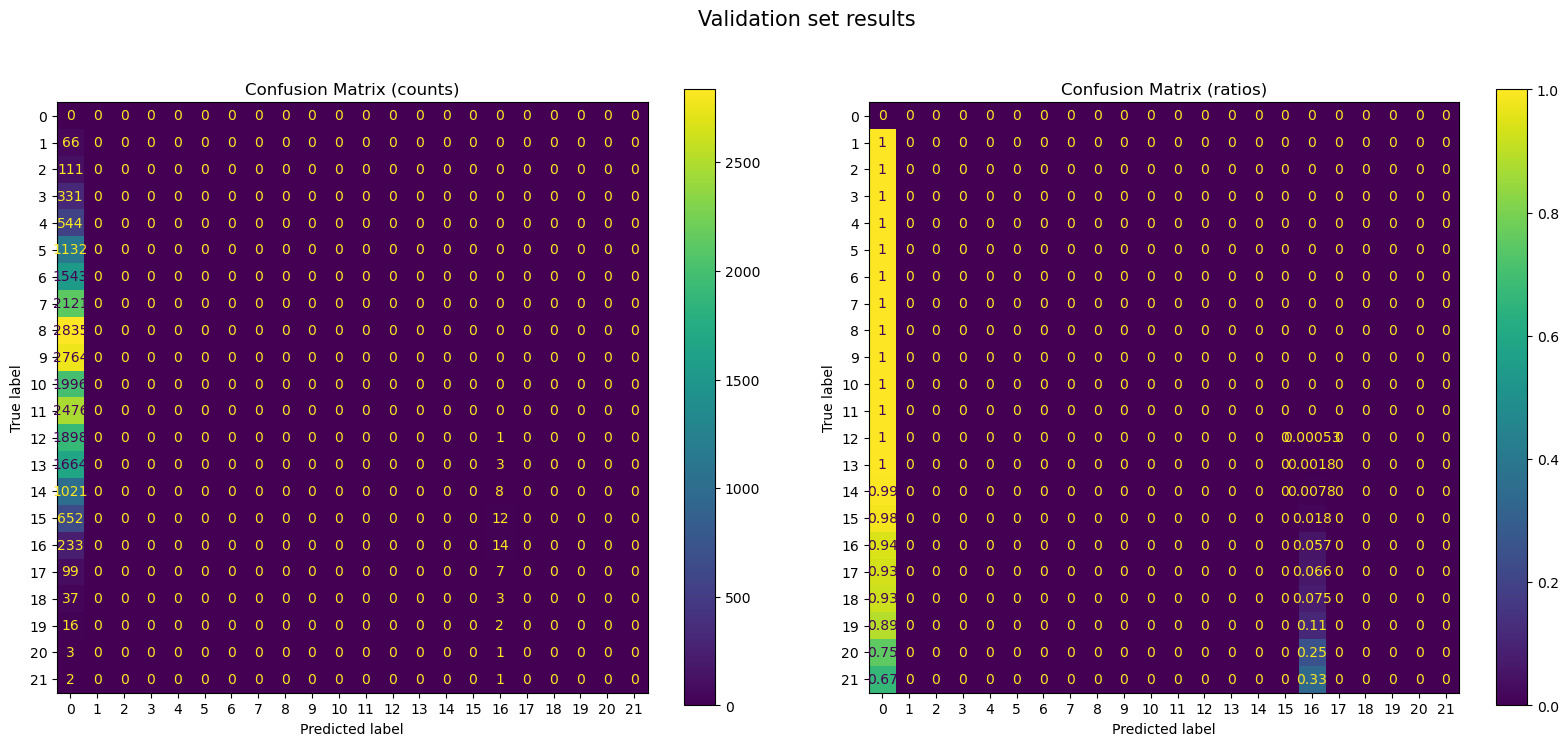

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_va, pred)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_va, pred, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()